In [ ]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
epochs = 8 # 訓練データを何回繰り返して学習させるのか

#学習させる画像のサイズ
img_rows, img_cols = 28, 28

# 学習データとテストデータに分割したデータを読み出す
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# backendがTensorflowとTheanoで配列のshapeが異なるために2パターン記述
# ニューラルネットワークに入力できる形に変換
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
  # 1次元配列に変換
  x_train = x_train.reshape(s_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  # 1次元配列に変換
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# 入力データ[0, 1]の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする->画素の最大が255なので、255で割ると[0, 1]になる
x_train /= 255
x_test /= 255

print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルをOne-Hotベクトルで表現
"""
追加分
例えば、サンプルに対する元クラスが「1」の場合次のような形になります。
[1, 0]
例えば、サンプルに対する元クラスが「4」の場合次のような形になります。
[0, 1]
"""
import numpy as np
import tensorflow as tf
num_classes = 2 # クラス数（奇数と偶数）
# ↓奇数と偶数に分ける
y_train_binary = np.zeros_like(y_train) #trainデータを入れるための行列を作成
y_train_binary[y_train % 2 == 0] = 1 #y_trainが2で割り切れる番号に1を代入
y_test_binary = np.zeros_like(y_test)
y_test_binary[y_test % 2 == 0] = 1

#One-Hotベクトルにしたデータをkerasが読み込める形に変換
y_train = tf.keras.utils.to_categorical(y_train_binary, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_binary, num_classes)

channels_last
x_train shape :  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# sampling to make small data for lecture
import numpy as np
y_train_org = y_train
x_train_org = x_train
#trainデータとして使う数を指定
N = 1000
#inds = range(N)
#データのインデックスの配列を作成->配列をシャッフル
#->インデックスの配列の先頭からtrainに使う数だけデータ取り出し
#こうすることで、全データからランダムでN個のデータを取り出すことができる
inds = np.array(range(60000))
np.random.shuffle(inds)
inds = inds[:N]
y_train = y_train[inds][:]
x_train = x_train[inds][:]
print(y_train.shape)

(1000, 2)


In [ ]:
# CNNネットワークの構築
model = Sequential()
#addで層を追加する,↓だとconv2dを追加
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape)) # 3×3のカーネルサイズの2D Convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu')) # 演習問題１はここを編集：少なくする場合はコメントアウト、多くする場合はコピペして追加
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dense(num_classes, activation='softmax'))

# 損失関数,最適化関数,評価指標を指定してモデルをコンパイル->学習できる形にする
model.compile(loss=keras.losses.categorical_crossentropy,
             #optimizer=keras.optimizers.Adadelta(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

Epoch 1/8
8/8 [==============================] - 17s 2s/step - loss: 0.5270 - accuracy: 0.7260 - val_loss: 0.3908 - val_accuracy: 0.8285
Epoch 2/8
8/8 [==============================] - 16s 2s/step - loss: 0.3487 - accuracy: 0.8460 - val_loss: 0.3273 - val_accuracy: 0.8491
Epoch 3/8
8/8 [==============================] - 16s 2s/step - loss: 0.2445 - accuracy: 0.9070 - val_loss: 0.2334 - val_accuracy: 0.9015
Epoch 4/8
8/8 [==============================] - 16s 2s/step - loss: 0.1774 - accuracy: 0.9380 - val_loss: 0.1583 - val_accuracy: 0.9402
Epoch 5/8
8/8 [==============================] - 16s 2s/step - loss: 0.1020 - accuracy: 0.9710 - val_loss: 0.1359 - val_accuracy: 0.9505
Epoch 6/8
8/8 [==============================] - 16s 2s/step - loss: 0.0764 - accuracy: 0.9750 - val_loss: 0.1176 - val_accuracy: 0.9593
Epoch 7/8
8/8 [==============================] - 16s 2s/step - loss: 0.0542 - accuracy: 0.9820 - val_loss: 0.1046 - val_accuracy: 0.9614
Epoch 8/8
8/8 [==========================

{'loss': [0.5269553065299988, 0.3486751914024353, 0.24453823268413544, 0.1774156391620636, 0.10199049860239029, 0.07639723271131516, 0.054186008870601654, 0.028511354699730873], 'accuracy': [0.7260000109672546, 0.8460000157356262, 0.9070000052452087, 0.9380000233650208, 0.9710000157356262, 0.9750000238418579, 0.9819999933242798, 0.9940000176429749], 'val_loss': [0.3907621502876282, 0.3273388743400574, 0.23341931402683258, 0.15826469659805298, 0.13585753738880157, 0.1175856962800026, 0.1045590341091156, 0.10470856726169586], 'val_accuracy': [0.828499972820282, 0.8490999937057495, 0.9014999866485596, 0.9401999711990356, 0.9505000114440918, 0.9592999815940857, 0.9613999724388123, 0.9629999995231628]}


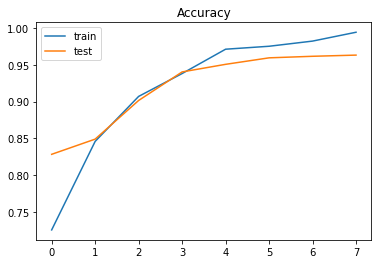

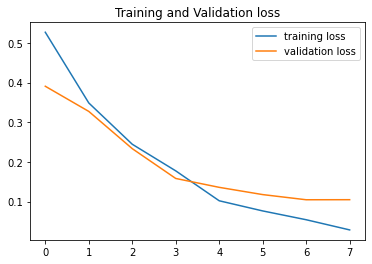

In [ ]:
import matplotlib.pyplot as plt
# 学習をグラフ化（正解率）
print(model.history.history)
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Accuracy Plot
# epochごとのtrainデータ、testデータの精度をplot
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Plot
# epochごとのtrainデータ、testデータのlossをplot
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(loss ,label = 'training loss')
plt.plot(val_loss, label= 'validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10470853000879288
Test accuracy: 0.9629999995231628


In [ ]:
# モデルの概要を表示
model.summary()
    
# 概要を画像に出力
#plot_model(model, to_file='model.png')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               991360    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

1845
[1. 0.]
[[1. 0.]]


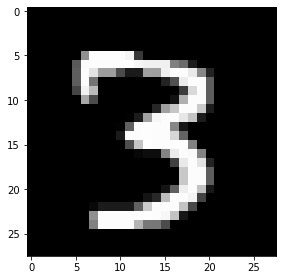

In [ ]:
# 1つのサンプルデータを用いてテスト
from skimage import io
import numpy as np
import random
# test dataをランダムに取得
ind = np.int16(np.round(random.random()*x_test.shape[0]))
print(ind)
x_sample = x_test[ind]
y_sample = y_test[ind]

# 画像を可視化
x_sample2 = x_sample.reshape(x_sample.shape[0], x_sample.shape[1])
print(y_sample)
io.imshow(x_sample2)
#plt.show()

# 予測関数入力用に変形
x_sample = x_sample.reshape(1, img_rows, img_cols, 1)

# ネットワークによる予測
expect = model.predict(x_sample)
print(np.round(expect))